#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

files = [file for file in os.listdir('./Sales_Data')]

all_months_raw_df = pd.DataFrame()

for file in files :
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_raw_df = pd.concat([all_months_raw_df, df])
    
    
# Saving the 'all_months_df' as a new csv file :

all_months_raw_df.to_csv("all_months_df2.csv", index=False)

all_months_df = all_months_raw_df

#### reading updating dataframe

In [2]:
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Data Cleaning

In [3]:
all_months_df.shape

(186850, 6)

In [4]:
all_months_df.count()

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [5]:
all_months_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

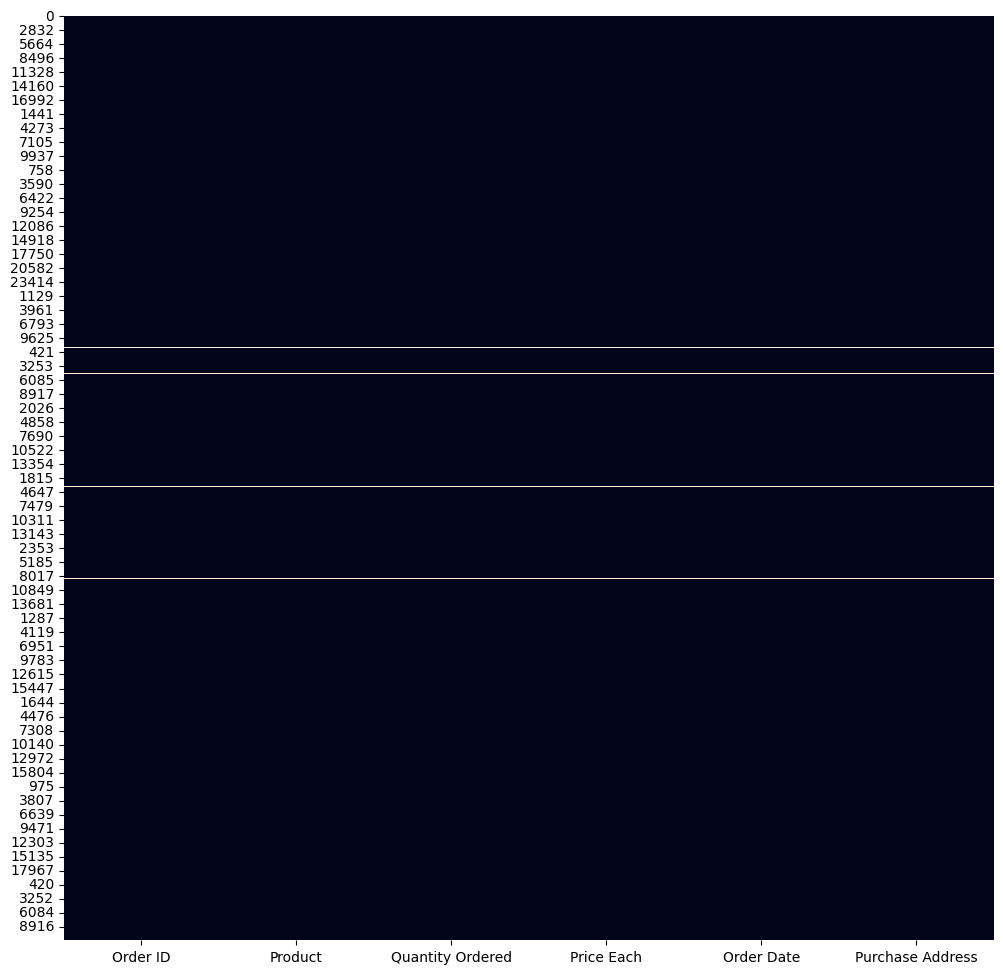

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(all_months_df.isnull(), cbar=False);

Looks like we have 545 empty rows, let's drop them

In [7]:
all_months_df.dropna(how='all', inplace=True)

In [8]:
all_months_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
all_months_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Let's convert the `Sales` columns into a date column :

In [10]:
all_months_df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [11]:
all_months_df = all_months_df[~(all_months_df['Quantity Ordered']=='Quantity Ordered')].reset_index(drop=True)

In [12]:
all_months_df.duplicated().any()

True

It looks like we have some duplicates in our dataframe, let's get rid of them :

In [13]:
all_months_df.drop_duplicates(inplace= True)

Let's convert our `Order Date` into a date column :

In [14]:
all_months_df['Order Date'] = pd.to_datetime(all_months_df['Order Date'])

 Let's also convert out `Quantity Ordered` and `Price Each` columns into numerical coiumns :

In [15]:
all_months_df['Quantity Ordered'] = pd.to_numeric(all_months_df['Quantity Ordered'])
all_months_df['Price Each'] = pd.to_numeric(all_months_df['Price Each'])


In [16]:
all_months_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

All the data types are looking good, let's see some informations about our dataframe :

In [17]:
all_months_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


How about some statistics :

In [18]:
all_months_df.describe()

,Quantity Ordered,Price Each
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


### Question 1 : What was the best month for sales ? How much was earned that month ?

In [19]:
all_months_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

Let's create 2 seprate columns for `Month` and `Day`, to simplify our analysis

In [20]:
all_months_df['Month'] = all_months_df['Order Date'].dt.month
all_months_df['Day'] = all_months_df['Order Date'].dt.day

Let's create also an `Order Price` column that actually shows the total price of the order :

In [21]:
all_months_df.insert(4, 'Sales', all_months_df['Quantity Ordered'] * all_months_df['Price Each'])

In [22]:
all_months_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Day
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7


In [23]:
sale_months = all_months_df.groupby('Month')['Sales'].sum()
sale_months.sort_values(ascending=False).to_frame()

,Sales
Month,
12,4608295.70
10,3734777.86
4,3389217.98
11,3197875.05
5,3150616.23
3,2804973.35
7,2646461.32
6,2576280.15
8,2241083.37


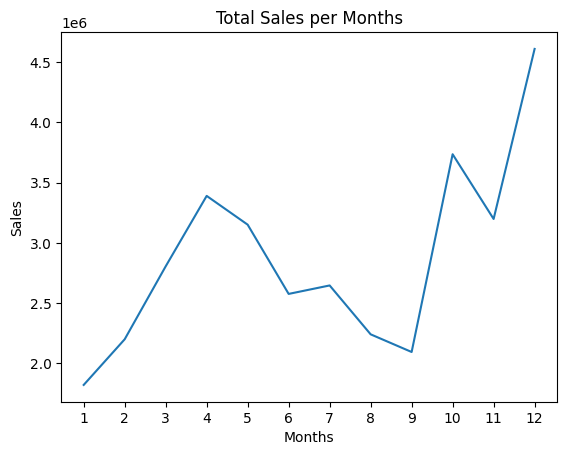

In [24]:
sns.lineplot(data = sale_months, x= sale_months.index, y = sale_months);
plt.xlabel('Months')
plt.xticks(sale_months.index)
plt.ylabel('Sales')
plt.title('Total Sales per Months');

Looks like the best month for sales was December, which is no surprise considering the holidays. Last position is January, which is also kindo of logical, people do the majority of there shopping in the holidays of December.

### Question 2 :  A - What city sold the mosts product?

In [25]:
all_months_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Day
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7


Let's create a new column `City` that tracks the sell city, for that we're going to use `str.split` 

In [26]:
def City_State(x) :
     return f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})"

all_months_df['City'] = all_months_df['Purchase Address'].apply(lambda x: City_State(x))

In [27]:
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Day,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,Boston (MA)
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,Los Angeles (CA)


In [28]:
all_months_df.groupby('City')['Sales'].count().sort_values(ascending=False).to_frame()

,Sales
City,
San Francisco (CA),44662
Los Angeles (CA),29564
New York City (NY),24847
Boston (MA),19901
Atlanta (GA),14863
Dallas (TX),14797
Seattle (WA),14713
Portland (OR),9998
Austin (TX),9890


City that sold the most products was 'San Fransisco'.

### Question 2 :  B - What city had the higher number of sales ?

In [29]:
ities_sales = all_months_df.groupby('City')['Sales'].sum().sort_values(ascending=False)
ities_sales.to_frame()

,Sales
City,
San Francisco (CA),8254743.55
Los Angeles (CA),5448304.28
New York City (NY),4661867.14
Boston (MA),3658627.65
Atlanta (GA),2794199.07
Dallas (TX),2765373.96
Seattle (WA),2745046.02
Portland (OR),1870010.56
Austin (TX),1818044.33


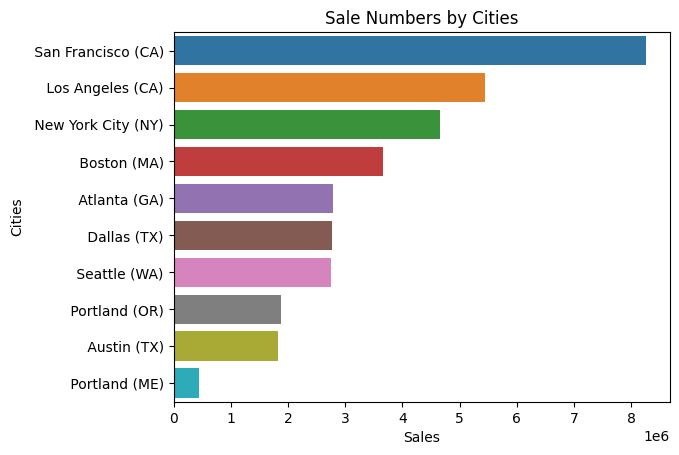

In [30]:
sns.barplot(y = ities_sales.index, x = ities_sales)
plt.xlabel('Sales')
plt.ylabel('Cities')
plt.title('Sale Numbers by Cities');

### Question 3 - What time should we display advertisements to maximize the likelihood of customer’s buying product?

We're going to a create an `Order Hour` columns that shows the hours when the purchases were made : 

In [31]:
all_months_df['Order Hour'] = all_months_df['Order Date'].dt.hour

In [32]:
all_months_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Day,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,Boston (MA),22


In [33]:
all_months_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Sales                      float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Day                          int64
City                        object
Order Hour                   int64
dtype: object

In [40]:
hours = all_months_df.groupby('Order Hour').count().sort_values('Order ID', ascending=False)['Order ID']
hours

Order Hour
19    12886
12    12573
11    12392
18    12263
20    12218
13    12115
14    10965
10    10929
21    10905
17    10884
16    10359
15    10159
22     8808
9      8740
23     6262
8      6252
7      4002
0      3902
6      2481
1      2347
5      1320
2      1242
4       852
3       830
Name: Order ID, dtype: int64

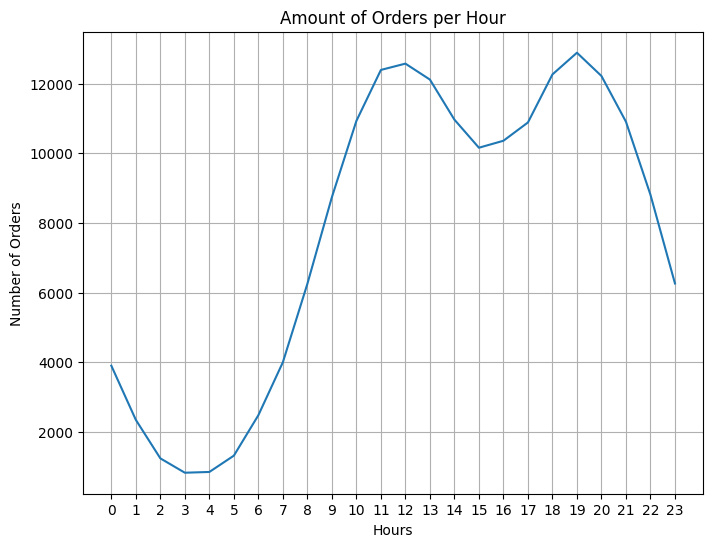

In [46]:
plt.figure(figsize=(8,6))

sns.lineplot(data = hours, x= hours.index, y=hours)
plt.grid()
plt.xlabel('Hours')
plt.xticks(hours.index)
plt.ylabel('Number of Orders')
plt.title('Amount of Orders per Hour');

The majority of orders occure at around 12h but also around 19h, so a good time to display advertisements would be in the ranges of [11h,12h] for the morning, and [18h,19h] for the evening.

### Question 4 - What products are most often sold ?

In [47]:
all_months_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales',
       'Order Date', 'Purchase Address', 'Month', 'Day', 'City', 'Order Hour'],
      dtype='object')

In [74]:
most_sold_prod = all_months_df['Product']
most_sold_prod

0               USB-C Charging Cable
1         Bose SoundSport Headphones
2                       Google Phone
3                   Wired Headphones
4                   Wired Headphones
                     ...            
185945        AAA Batteries (4-pack)
185946                        iPhone
185947                        iPhone
185948        34in Ultrawide Monitor
185949          USB-C Charging Cable
Name: Product, Length: 185686, dtype: object

<Axes: xlabel='count', ylabel='Product'>

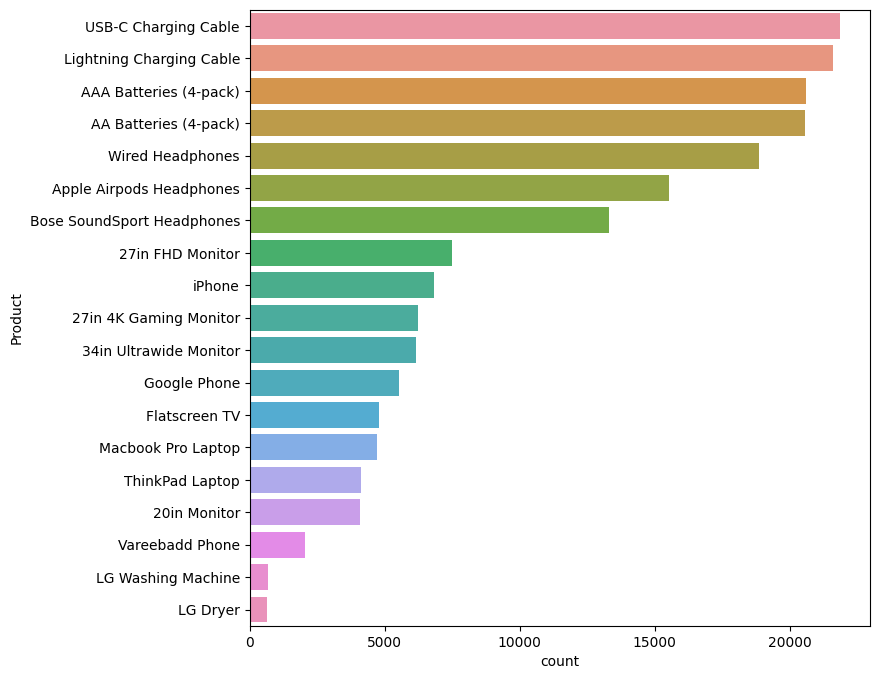

In [79]:
plt.figure(figsize=(8, 8))

sns.countplot(y = most_sold_prod, order = most_sold_prod.value_counts().index) 

 ### Question 4 - What products are most often sold together?

In [101]:
all_months_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales',
       'Order Date', 'Purchase Address', 'Month', 'Day', 'City', 'Order Hour'],
      dtype='object')

In [153]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

df = all_months_df[all_months_df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Badr\AppData\Local\Temp\ipykernel_4280\2249997571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [154]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5 - What product sold the most? Why do you think it sold the most?

In [251]:
quantity_ordered = all_months_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).to_frame()
quantity_ordered

,Quantity Ordered
Product,
AAA Batteries (4-pack),30986
AA Batteries (4-pack),27615
USB-C Charging Cable,23931
Lightning Charging Cable,23169
Wired Headphones,20524
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
27in FHD Monitor,7541
iPhone,6847


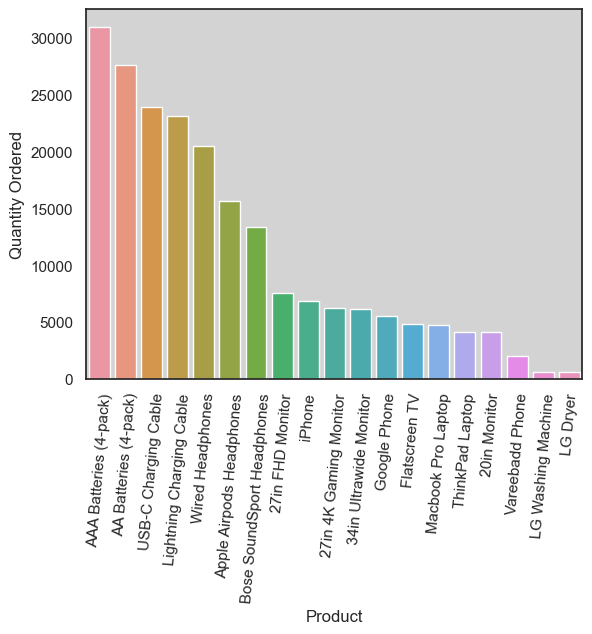

In [255]:
ax1 = sns.barplot(data = quantity_ordered, x = quantity_ordered.index, y='Quantity Ordered')
ax1.set_facecolor('lightgray')

plt.xticks(rotation=85);

The batteries were sold the most, maybe because there are cheap, meanwhile LG Dryer is dead last maybe it's due again to it's high cost.

In [262]:
product_prices = all_months_df[['Product', 'Price Each']].drop_duplicates().set_index("Product")
product_prices

,Price Each
Product,
USB-C Charging Cable,11.95
Bose SoundSport Headphones,99.99
Google Phone,600.00
Wired Headphones,11.99
Macbook Pro Laptop,1700.00
Lightning Charging Cable,14.95
27in 4K Gaming Monitor,389.99
AA Batteries (4-pack),3.84
Apple Airpods Headphones,150.00


In [266]:
# Merging the datframes : 

df = pd.merge(quantity_ordered, product_prices, left_index=True, right_index=True)
df

,Quantity Ordered,Price Each
Product,,
AAA Batteries (4-pack),30986,2.99
AA Batteries (4-pack),27615,3.84
USB-C Charging Cable,23931,11.95
Lightning Charging Cable,23169,14.95
Wired Headphones,20524,11.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
27in FHD Monitor,7541,149.99
iPhone,6847,700.00


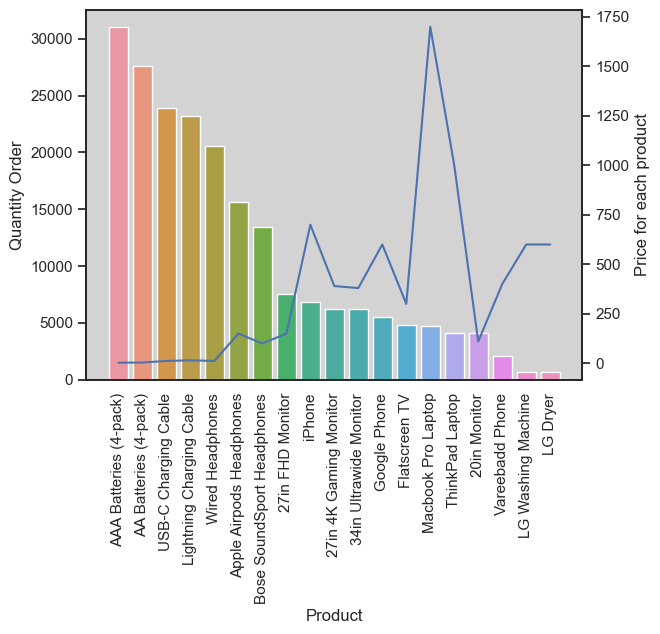

In [267]:
plt.xticks(rotation=90)
ax = sns.barplot(x = df.index, y=df['Quantity Ordered'])

# Create a second y-axis on the right side

ax2 = ax.twinx()



sns.lineplot(y= df['Price Each'], x= df.index, ax=ax2)

# Set y-axis labels
ax.set_ylabel("Quantity Order")
ax2.set_ylabel("Price for each product")



ax.set_facecolor('lightgray');

As we can see in the graph above, the price of the product play a major role in the purchases made. Even though we can see some discrepancies which are always predictable, like the 'Macbook Pro Laptop' which was ordered more than an 'LG Dryer' regardless of the higher price, maybe it's due to the popularity of Apple products with the customers.